# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [143]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [144]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [145]:
#  1. Get the total rides for each city type
ride_count_by_type = pyber_data_df.groupby(["type"]).count()['ride_id']
ride_count_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [146]:
# 2. Get the total drivers for each city type
driver_count_by_type = city_data_df.groupby(["type"]).sum()['driver_count']
driver_count_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [147]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()['fare']
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [148]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride_by_type = total_fares_by_type/ ride_count_by_type
average_fare_per_ride_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [149]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver_by_type = total_fares_by_type / driver_count_by_type
average_fare_per_driver_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [150]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({
                    "Total Rides" : ride_count_by_type,
                    "Total Drivers" : driver_count_by_type,
                    "Total Fares" : total_fares_by_type,
                    "Average Fare per Ride" : average_fare_per_ride_by_type,
                    "Average Fare per Driver" : average_fare_per_driver_by_type})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [151]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [152]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [153]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [154]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_by_date_plus_type = pyber_data_df.groupby(["type", "date"]).sum()[['fare']]
fare_by_date_plus_type

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26
...                      ...
Urban 5/8/2019 1:54    32.69
      5/8/2019 2:31    41.33
      5/8/2019 4:20    21.99
      5/8/2019 4:39    18.45
      5/8/2019 7:29    18.55

[2364 rows x 1 columns]

In [155]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_by_date_plus_type = fare_by_date_plus_type.reset_index()
fare_by_date_plus_type

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [156]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.
pivot_fare_by_date_plus_type = fare_by_date_plus_type.pivot(index="date", columns="type", values="fare")
pivot_fare_by_date_plus_type
 


type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [157]:
print(list(pivot_fare_by_date_plus_type.columns))

['Rural', 'Suburban', 'Urban']


In [158]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
first_q_pivot_fare_by_date = pivot_fare_by_date_plus_type.loc["1/1/2019":"4/29/2019"]

first_q_pivot_fare_by_date


type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
4/28/2019 4:34,NaN,NaN,40.46
4/28/2019 8:15,NaN,NaN,22.86
4/28/2019 9:03,NaN,NaN,15.00


In [159]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
first_q_pivot_fare_by_date.index = pd.to_datetime(first_q_pivot_fare_by_date.index)
first_q_pivot_fare_by_date

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-28 04:34:00,NaN,NaN,40.46
2019-04-28 08:15:00,NaN,NaN,22.86
2019-04-28 09:03:00,NaN,NaN,15.00


In [160]:
# 7. Check that the datatype for the index is datetime using df.info()
first_q_pivot_fare_by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [161]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fare_by_date = first_q_pivot_fare_by_date.resample("W").sum()
weekly_fare_by_date

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


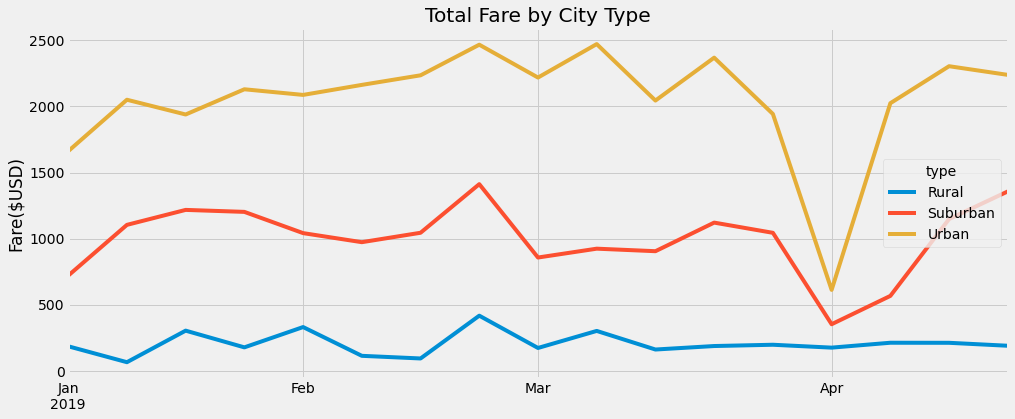

<Figure size 432x288 with 0 Axes>

In [199]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

weekly_fare = weekly_fare_by_date.plot(figsize = (15, 6))

weekly_fare.set_title("Total Fare by City Type")

weekly_fare.set_ylabel("Fare($USD)")
weekly_fare.set_xlabel("")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.show()
plt.savefig('analysis/PyBer_fare_summary.png')